In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Imoirt the packages to plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv


Import the data

In [3]:
# visualize the train date set
train = pd.read_csv('/kaggle/input/titanic/train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# visualize the test data set
test = pd.read_csv('/kaggle/input/titanic/test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# visualize the gender submission data set
gender_submission = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


Cleaning the data

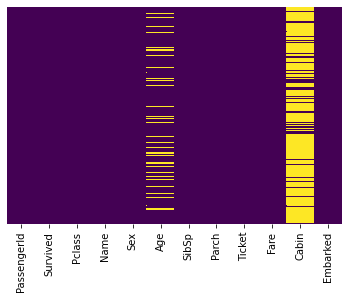

In [6]:
# check if there are missing data in the training set
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


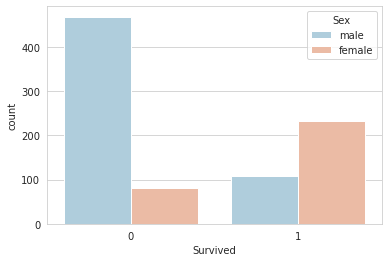

In [9]:
# as there are several missing data regarding the age of the passengers and their cabin, it is necessary to analyse the date to decide how to clean them

# it is fist check if one sex was more luckly to survive then another
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 0, 'Age')

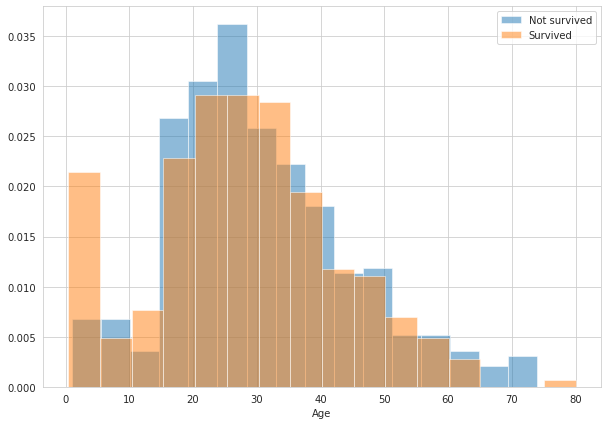

In [52]:
# then if the age contributes in any way with the chance to survive
plt.figure(figsize=(10,7))
plt.hist(train[train['Survived']==0]['Age'],label='Not survived', alpha=0.5,bins=16,density=True)
plt.hist(train[train['Survived']==1]['Age'],label='Survived',alpha=0.5,bins=16,density=True)
plt.legend()
plt.xlabel('Age')

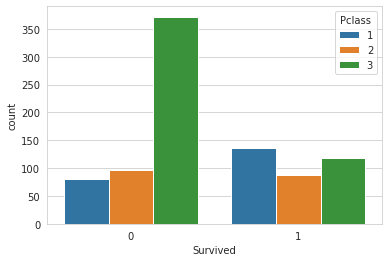

In [11]:
# if the class affects the survival chance
sns.countplot(x='Survived',hue='Pclass',data=train)

Text(0.5, 0, 'Fare')

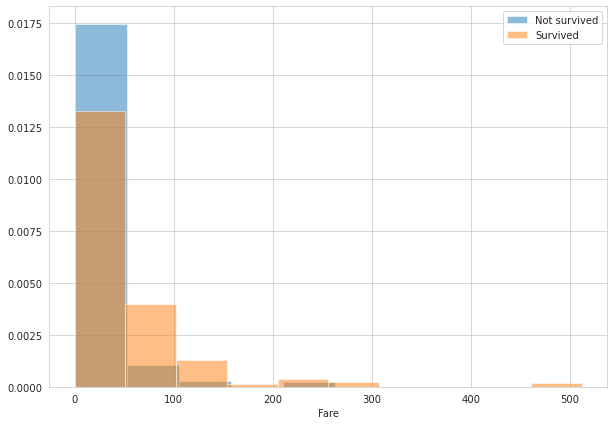

In [59]:
# then if the fere contributes in any way with the chance to survive
plt.figure(figsize=(10,7))
plt.hist(train[train['Survived']==0]['Fare'],label='Not survived', alpha=0.5,bins=5,density=True)
plt.hist(train[train['Survived']==1]['Fare'],label='Survived',alpha=0.5,bins=10,density=True)
plt.legend()
plt.xlabel('Fare')

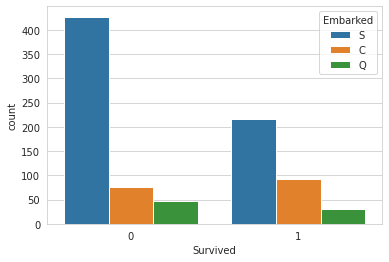

In [60]:
# if the class affects the survival chance
sns.countplot(x='Survived',hue='Embarked',data=train)

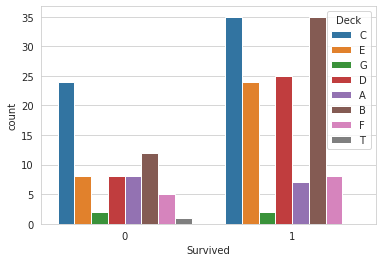

In [81]:
# if the Deck they were on aggects theirs survival chance
train['Deck'] = train['Cabin'].str[0]
train.drop(['Cabin'], axis=1,inplace=True)

Because most of the cabins assigned to the passengers are unkowon we decide to consider the unkown deck as a deck type itself

In [102]:
# create the function
def inpute_Deck(col):
    
    if pd.isnull(col):
        return 'Z'
    else:
        return col

In [99]:
# we run the function so we can consider the unkown deck as a deck itself
train['Deck']  = train['Deck'].apply(inpute_Deck)

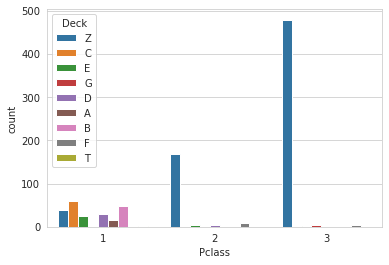

In [100]:
# it is checked if the type of deck is related to the class
sns.countplot(x='Pclass',hue='Deck',data=train)

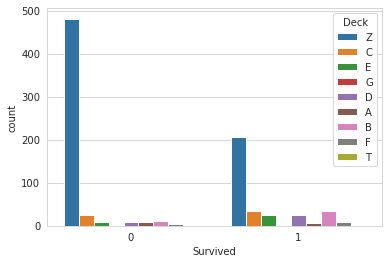

In [101]:
# plot to see if the decks are related to survival chances
sns.countplot(x='Survived',hue='Deck',data=train)

It is now necessary to decide what to do with the unkown passenger ages

In [ ]:
# it is checked if the age is related to the class
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=train)